In [30]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler  

df=pd.read_csv('MRec2.csv')
df.head()

,Age,Gender,Mood,Genre,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,18,F,Happy,Rock,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,18,F,Gloomy,Instrumental,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,18,F,Stressed,Pop,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,18,F,Relaxing,Pop,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,18,F,Energetic,Hiphop,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
#Checking number of unique values
print(df.nunique())
df.describe()

Age            24
Gender          2
Mood            5
Genre           8
Unnamed: 4      0
Unnamed: 5      0
Unnamed: 6      0
Unnamed: 7      0
Unnamed: 8      0
Unnamed: 9      0
Unnamed: 10     0
dtype: int64


,Age,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
count,330.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,28.560606,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,8.422955,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,22.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,25.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,33.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
#Checking for null values to fill
df.isnull().sum()

Age              0
Gender           0
Mood             0
Genre            0
Unnamed: 4     330
Unnamed: 5     330
Unnamed: 6     330
Unnamed: 7     330
Unnamed: 8     330
Unnamed: 9     330
Unnamed: 10    330
dtype: int64

In [33]:
#Replacing categorical data with integer values

df['Gender'].replace(['M','F'],[0,1], inplace=True)
df['Mood'].replace(['Happy','Gloomy','Stressed','Relaxing','Energetic'],[1,2,3,4,5], inplace=True)
df.head(7)


,Age,Gender,Mood,Genre,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,18,1,1,Rock,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,18,1,2,Instrumental,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,18,1,3,Pop,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,18,1,4,Pop,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,18,1,5,Hiphop,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,19,0,1,Pop,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,19,0,2,EDM,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
#Dropping empty columns
df = df.dropna(axis='columns', how='all')

print("Data after dropping empty columns:")
print(df.shape)

Data after dropping empty columns:
(330, 4)


In [41]:
#Handling missing data

indp= df.iloc[:,:-1].values 
dpn= df.iloc[:,3].values

#Replacing missing data with the mean value
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

#Fitting imputer object to the independent variables.   
imputerimputer= imputer.fit(indp[:, 1:3])  

#Replacing missing data with the calculated mean value  
indp[:, 1:3]= imputer.transform(indp[:, 1:3]) 

df.head(7)

,Age,Gender,Mood,Genre
0,18,1,1,Rock
1,18,1,2,Instrumental
2,18,1,3,Pop
3,18,1,4,Pop
4,18,1,5,Hiphop
5,19,0,1,Pop
6,19,0,2,EDM


In [42]:
#Mean, Variance, Std-deviation
print("Mean of age with outliers:")
print(np.mean(np.append(df["Age"],50)));
print("nStd-dev of age:");
print(np.std(df["Age"]))

#Median
print("Median of age:")
print(np.median(df["Age"]))

print("nQuantiles:")
print(np.percentile(df["Age"],np.arange(0, 100, 25)))

Mean of age with outliers:
28.62537764350453
nStd-dev of age:
8.41018283928871
Median of age:
25.0
nQuantiles:
[18. 22. 25. 33.]


In [46]:
#Model testing
X=df[['Age','Gender','Mood']]
y=df['Genre']
X_train,X_test,y_train,y_test=train_test_split(X.values,y,test_size=0.2)
model=DecisionTreeClassifier()
model.fit(X_train, y_train)

predictions=model.predict([ [21,0,4],[21,1,1],[24,0,1],[31,0,4],[22,0,5] ])
predictions

array(['Indie/Acoustic', 'Pop', 'Pop', 'Rock', 'Rock'], dtype=object)

Text(0.5, 1.0, 'Count of demographics in dataset:')

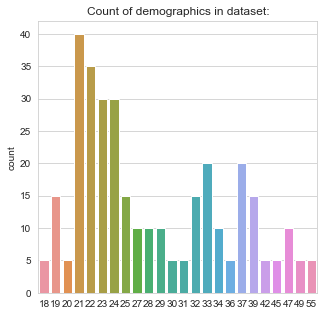

In [47]:
fig, ax = plt.subplots(figsize = (5, 5))
sns.countplot(x = df.Age.values, data=df)
ax.set_title("Count of demographics in dataset:")

<AxesSubplot:xlabel='Age', ylabel='Genre'>

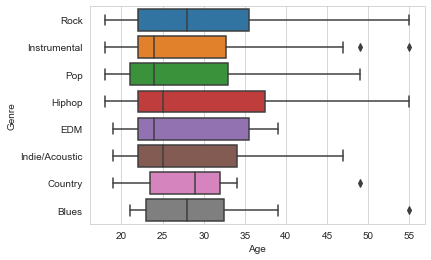

In [48]:
sns.boxplot(x='Age',y='Genre',data=df)

<AxesSubplot:xlabel='Mood', ylabel='Genre'>

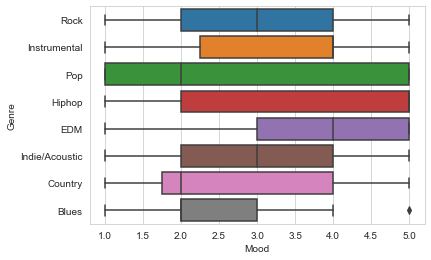

In [49]:
sns.boxplot(x='Mood',y='Genre',data=df)

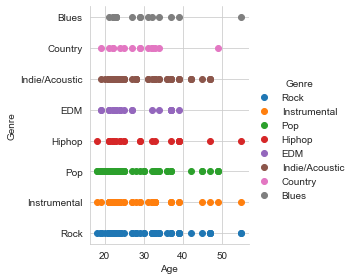

In [50]:
sns.set_style("whitegrid");
sns.FacetGrid(df, hue="Genre", height=4).map(plt.scatter, "Age", "Genre").add_legend();
plt.show();

In [51]:
#Outliers
q1=df.quantile(0.25)
q3=df.quantile(0.75)
iqr=q3-q1
#print(df['Age'].quantile(0.5))
print(
    (df<(q1-1.5*iqr)) | (df>(q3+1.5*iqr))
)
#df['Age'].describe()

       Age  Gender  Genre   Mood
0    False   False  False  False
1    False   False  False  False
2    False   False  False  False
3    False   False  False  False
4    False   False  False  False
..     ...     ...    ...    ...
325   True   False  False  False
326   True   False  False  False
327   True   False  False  False
328   True   False  False  False
329   True   False  False  False

[330 rows x 4 columns]


C:\Users\User\AppData\Local\Temp\ipykernel_9468\1504799766.py:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  (df<(q1-1.5*iqr)) | (df>(q3+1.5*iqr))


In [41]:
#Feature-scaling
st_x= StandardScaler()  
X_train= st_x.fit_transform(X_train)
X_test= st_x.transform(X_test)
